## PHYS 249 Assignment #8:  Non-Linear Equations & Differential Equations

(See units 17-20)

### 1) Roots of a Polynomial
(based on Newman 6.15 - chapter 6, p.273 of the text for details.)

Consider the sixth-order polynomial

$$P(x) = 924x^6 − 2772x^5 + 3150x^4 − 1680x^3 + 420x^2 − 42x + 1$$


**a)** Make a plot of P(x) from $x=0$ to $x=1$ and estimate roughly (to within 0.01) where its six roots are.


Roots: [0.96623476 0.83060469 0.61930959 0.38069041 0.16939531 0.03376524]


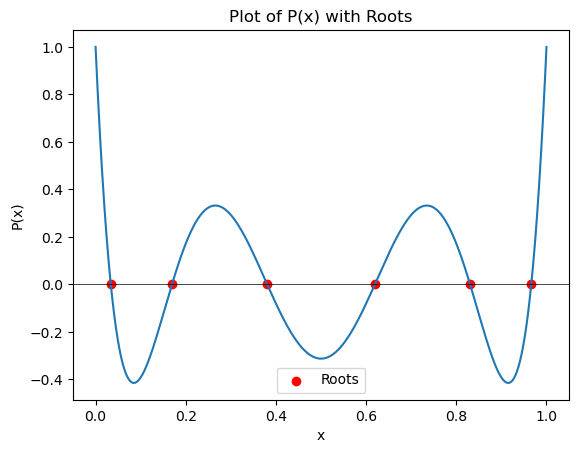

In [94]:
import numpy as np
import matplotlib.pyplot as plt

def P(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

xp = np.linspace(0, 1, 10000)
yp = [P(i) for i in xp]


roots = np.roots([924, -2772, 3150, -1680, 420, -42, 1])


print("Roots:", roots)
plt.scatter(roots, [0] * len(roots), color='red', marker='o', label='Roots')
plt.plot(xp,yp)

plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Plot of P(x) with Roots')
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

# with estimation, the roots are at

**b)** Write a Python program to calculate the exact value of the six roots to ten decimal places accuracy, using Newton’s method.

In [75]:
def P(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1
def dP(x):
    return 5544*x**5 - 13860*x**4 + 12600*x**3 - 5040*x**2 + 840*x - 42

def newton(P, dP, x0, tol):
    if abs(P(x0)) < tol:
        return x0
    else:
        return newton(P, dP, x0 - P(x0)/dP(x0), tol)


# using points as guesses that are close to the roots found in part a
print("estimate 1 =", newton(P, dP, 1, 1e-10))
print("estimate 2 =", newton(P, dP, 0.85, 1e-10))
print("estimate 3 =", newton(P, dP, 0.62, 1e-10))
print("estimate 4 =", newton(P, dP, 0.40, 1e-10))
print("estimate 5 =", newton(P, dP, 0.18, 1e-10))
print("estimate 6 =", newton(P, dP, 0.04, 1e-10))


estimate 1 = 0.9662347571015851
estimate 2 = 0.830604693233163
estimate 3 = 0.6193095930416384
estimate 4 = 0.3806904069583867
estimate 5 = 0.16939530676661566
estimate 6 = 0.03376524289842399


### 2) A 2D Simple Bouncing Ball

Consider a ball bouncing around a 2D rectangular box, with horizontal/vertical sides at $(x_0,x_1, y_0,y_1)$. 

**a)** To begin with, we will ignore gravtiy and any other forces, and assume that the ball simply moves at constant velocity without acceleration/deceleration, until it hits a wall. At that point, the velocity component normal to the wall is reversed, while the other component remains unchanged.

The code stub below sets up the problem and evolves the ball forward with time, but includes the condition for only one wall.

Add the conditions for the other walls, run the code and plot the motion of the ball.


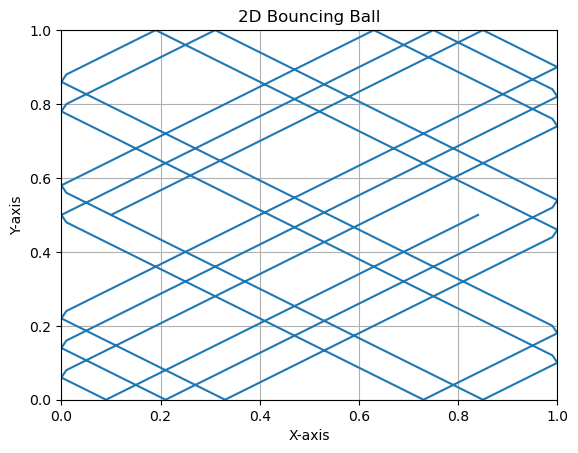

In [118]:
import matplotlib.pyplot as plt

def update_position(position, velocity, bounds):
    x, y = position
    vx, vy = velocity
    x0, x1, y0, y1 = bounds

    x += vx
    y += vy

    if x < x0 or x > x1:
        vx = -vx  
    if y < y0 or y > y1:
        vy = -vy 
    x = max(x0, min(x, x1))
    y = max(y0, min(y, y1))

    return (x, y), (vx, vy)

def simulate_bouncing_ball(num_steps, initial_position, initial_velocity, bounds):
    positions = [initial_position]
    velocities = [initial_velocity]

    for _ in range(num_steps):
        position, velocity = update_position(positions[-1], velocities[-1], bounds)
        positions.append(position)
        velocities.append(velocity)

    return positions

num_steps = 500
initial_position = (0.1, 0.5)
initial_velocity = (0.03, 0.02)
bounds = (0, 1, 0, 1)


positions = simulate_bouncing_ball(num_steps, initial_position, initial_velocity, bounds)

x_values, y_values = zip(*positions)

plt.plot(x_values, y_values)
plt.title('2D Bouncing Ball')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(bounds[0], bounds[1])
plt.ylim(bounds[2], bounds[3])
plt.grid(True)
plt.show()


**b)** Now add acceleration due to gravity, with the usual gravitational constant g = 9.81 downwards. The motion should become more realistic.

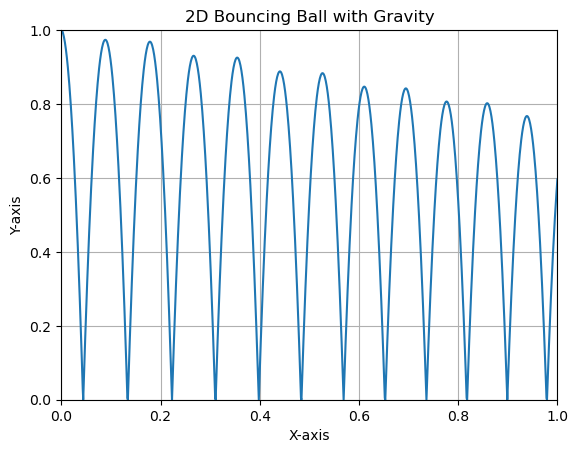

In [124]:
import matplotlib.pyplot as plt

def update_position(position, velocity, bounds, dt, g):
    x, y = position
    vx, vy = velocity
    x0, x1, y0, y1 = bounds
    vy -= g * dt
    x += vx * dt
    y += vy * dt
    if x < x0 or x > x1:
        vx = -vx  
    if y < y0 or y > y1:
        vy = -vy  
    x = max(x0, min(x, x1))
    y = max(y0, min(y, y1))

    return (x, y), (vx, vy)

def simulate_bouncing_ball(num_steps, initial_position, initial_velocity, bounds, dt, g):
    positions = [initial_position]
    velocities = [initial_velocity]

    for _ in range(num_steps):
        position, velocity = update_position(positions[-1], velocities[-1], bounds, dt, g)
        positions.append(position)
        velocities.append(velocity)

    return positions

num_steps = 1000
initial_position = (0.00, 1)
initial_velocity = (0.1, 0.3)
bounds = (0, 1, 0, 1)
dt = 0.01  
g = 9.81  

positions = simulate_bouncing_ball(num_steps, initial_position, initial_velocity, bounds, dt, g)

x_values, y_values = zip(*positions)

plt.plot(x_values, y_values)
plt.title('2D Bouncing Ball with Gravity')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(bounds[0], bounds[1])
plt.ylim(bounds[2], bounds[3])
plt.grid(True)
plt.show()


**c)** Now make a second version of the code that uses RK4 integration rather than Euler. 

The lines of code for RK4 might look something like:

        k1 = dt*deriv(p, t)
        k2 = dt*deriv(p + 0.5*k1,t+0.5*dt)
        k3 = dt*deriv(p + 0.5*k2,t+0.5*dt)
        k4 = dt*deriv(p + k3,t+dt)
        p += (k1+2*k2+2*k3+k4)/6.0

Run the Euler code and the RK4 code, check energy conservation for the two by plotting versus time the total energy per unit mass:

$$E/m = P/m + K/m = yg + \frac{1}{2} v^2$$. 

Adjust the number of timesteps until energy is conserved to 10\% from $t = 0$ to $t = 10$.


In [1]:
import matplotlib.pyplot as plt

def update_position_rk4(position, velocity, bounds, dt, g):
    def deriv(p, t):
        x, y = p
        vx, vy = velocity
        return [vx, vy - g]

    p = list(position)
    t = 0

    k1 = dt * deriv(p, t)
    k2 = dt * deriv([p[i] + 0.5 * k1[i] for i in range(2)], t + 0.5 * dt)
    k3 = dt * deriv([p[i] + 0.5 * k2[i] for i in range(2)], t + 0.5 * dt)
    k4 = dt * deriv([p[i] + k3[i] for i in range(2)], t + dt)

    p += (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) / 6.0, (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) / 6.0

    x0, x1, y0, y1 = bounds
    if p[0] < x0 or p[0] > x1:
        velocity = (-velocity[0], velocity[1])
    if p[1] < y0 or p[1] > y1:
        velocity = (velocity[0], -velocity[1])

    p[0] = max(x0, min(p[0], x1))
    p[1] = max(y0, min(p[1], y1))

    return tuple(p), velocity


def simulate_bouncing_ball_rk4(num_steps, initial_position, initial_velocity, bounds, dt, g):
    positions = [initial_position]
    velocities = [initial_velocity]

    for _ in range(num_steps):
        position, velocity = update_position_rk4(positions[-1], velocities[-1], bounds, dt, g)
        positions.append(position)
        velocities.append(velocity)

    return positions

def calculate_energy(positions, velocities, g):
    energies = []
    for i in range(len(positions)):
        x, y = positions[i]
        vx, vy = velocities[i]
        potential_energy = y * g
        kinetic_energy = 0.5 * (vx**2 + vy**2)
        total_energy = potential_energy + kinetic_energy
        energies.append(total_energy)
    return energies

num_steps = 1000
initial_position = (0.00, 1)
initial_velocity = (0.1, 0.3)
bounds = (0, 1, 0, 1)
dt = 0.01  
g = 9.81  

positions_rk4 = simulate_bouncing_ball_rk4(num_steps, initial_position, initial_velocity, bounds, dt, g)
x_values_rk4, y_values_rk4 = zip(*positions_rk4)
energies_rk4 = calculate_energy(positions_rk4, velocities_rk4, g)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(x_values_euler, y_values_euler, label='Euler')
plt.plot(x_values_rk4, y_values_rk4, label='RK4')
plt.title('2D Bouncing Ball with Gravity')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(bounds[0], bounds[1])
plt.ylim(bounds[2], bounds[3])
plt.legend()


TypeError: can't multiply sequence by non-int of type 'float'

**d)** Finally, add realistic enery dissipation to the code, assuming that the norm of the velocity is reduced by 5\% at each bounce.
